# Sage test display notebook

This is to test various displays in the **Jupyter Notebook** (classic) or **JupyterLab**: LaTeX, interactive widgets, 2d and 3d plots, animated 3d plots, Matplotlib interface, etc., especially in the scope of `%display latex`. 

In [1]:
version()

'SageMath version 9.6.beta5, Release Date: 2022-03-12'

In [2]:
%display latex

In [3]:
sin(x^2)

sin(x^2)

## Miscellaneous outputs in the scope of `%display latex`

### Check that [#32859](https://trac.sagemath.org/ticket/32859) is fixed (output of `type()`)

In [4]:
type(x)

<class 'sage.symbolic.expression.Expression'>

### Check that [#32208](https://trac.sagemath.org/ticket/32208) is fixed

In [5]:
set([1,2])

{1, 2}

In [6]:
RubiksCube()

+--------------+
             |  1    2    3 |
             |  4   top   5 |
             |  6    7    8 |
+------------+--------------+-------------+------------+
|  9  10  11 | 17   18   19 | 25   26  27 | 33  34  35 |
| 12 left 13 | 20  front 21 | 28 right 29 | 36 rear 37 |
| 14  15  16 | 22   23   24 | 30   31  32 | 38  39  40 |
+------------+--------------+-------------+------------+
             | 41   42   43 |
             | 44 bottom 45 |
             | 46   47   48 |
             +--------------+

## Test of IPython native LaTeX display via `_repr_latex_`

IPython implements LaTeX display of all objects that are endowed with a method `_repr_latex_`, cf. IPyhton's [rich display documentation](https://ipython.readthedocs.io/en/stable/config/integrating.html).

In [7]:
%display plain

In [8]:
s = sin(x^2)
s

sin(x^2)

In the plain text mode, the only way to get the LaTeX display of some object is via the function `view`, which generates a pdf file:

In [9]:
view(s)

Let us test the `_repr_latex_` mechanism of IPython via the method `_latex_` of Sage objects:

In [10]:
s._latex_()

'\\sin\\left(x^{2}\\right)'

In [11]:
class NativeDisplay(SageObject):

    def __init__(self, data):
        self._data = data

    def _repr_latex_(self):
        try:
            return '$' + self._data._latex_() + '$'
        except (AttributeError, NotImplementedError):  
            return None  # if None is returned, plain text is used


We get a LaTeX display, even if we are the scope of `%display plain`:

In [12]:
s

sin(x^2)

In [13]:
NativeDisplay(s)

In [14]:
NativeDisplay([s, s])

In [15]:
g = plot(s)
print(NativeDisplay(g))

Test of IPython native LaTeX display in the scope of `%display latex`
**(this fails with Sage 9.6.beta5)**:

In [16]:
%display latex

NativeDisplay(s)

## Test of matplotlib.pyplot

### Check that [#32882](https://trac.sagemath.org/ticket/32882) is fixed:

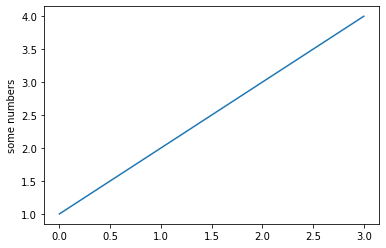

In [17]:
%display latex

import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

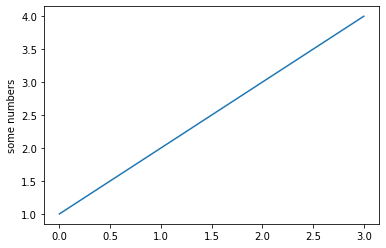

In [18]:
%display plain

import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

### Check that `%matplotlib notebook` and `%matplotlib widget` work in the scope of  `%display latex`  ([#33469](https://trac.sagemath.org/ticket/33469))

`%matplotlib notebook` provides an interactive Matplotlib window in the Jupyter Notebook. It is however not supported by **Jupyterlab**; one should use `%matplotlib widget` instead (which requires the Python package `ipympl`).

**This fails in Sage 9.6.beta5**:

In [19]:
%display latex

#%matplotlib notebook
%matplotlib widget
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))

Test of the solution proposed at [#33469](https://trac.sagemath.org/ticket/33469):

In [20]:
sage.repl.display.formatter.IPYTHON_NATIVE_TYPES

(<class 'IPython.core.display.DisplayObject'>,
 <class 'ipywidgets.widgets.interaction.interactive'>)

In [21]:
import ipywidgets
sage.repl.display.formatter.IPYTHON_NATIVE_TYPES += (ipywidgets.Widget,)

sage.repl.display.formatter.IPYTHON_NATIVE_TYPES

(<class 'IPython.core.display.DisplayObject'>,
 <class 'ipywidgets.widgets.interaction.interactive'>,
 <class 'ipywidgets.widgets.widget.Widget'>)

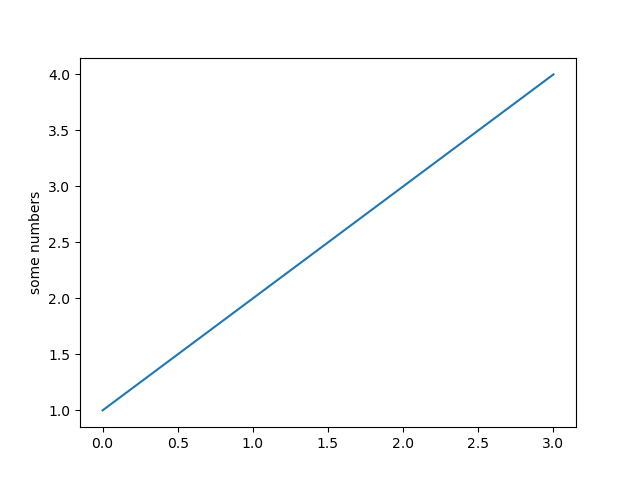

In [22]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

## Test of interact in the scope of `%display latex`

First we test it with `%display plain`:

In [23]:
%display plain 

@interact
def f(n=10):
    print(n)

Interactive function <function f at 0x7f9da9e7d160> with 1 widget
  n: IntSlider(value=10, description='n', ma…

and then we switch on the LaTeX display:

In [24]:
%display latex

In [25]:
@interact
def f(n=10):
    print(n)

Interactive function <function f at 0x7f9da9e7d550> with 1 widget
  n: IntSlider(value=10, description='n', ma…

## Test of 2d interactive plots

In [26]:
%display latex

In [27]:
@interact
def _(a = slider([1..10]), 
      color=Color('red'),
      axes=checkbox(True, 'Show axes'), 
      x_label=input_box('$x$', 'x-label', str),
      y_label=input_box('$y$', 'y-label', str)):
    axes_labels = [x_label, y_label] if axes else None
    show(plot(cos(a*x), (x, 0, 2*pi), color=color, thickness=2), 
         axes=axes, axes_labels=axes_labels)

Interactive function <function _ at 0x7f9da9e20550> with 5 widgets
  a: SelectionSlider(description='a', optio…

## Test of 3d plots

In [28]:
x, y = var('x y')
g = (plot3d(sin(x*y), (x, -pi, pi), (y, -pi, pi), color='green')
     + sphere() 
     + icosahedron(center=(0, 0, 2), color='red')
     + text3d('A nice plot', (-4, -4, 2), color='orange', 
              fontsize='200%', fontfamily='serif', fontweight='bold'))
g

Graphics3d Object

### Animated 3D plots

In [29]:
n = 20
animate([plot3d(sin((x - k*pi/(n-1))*y), (x, -pi, pi), (y, -pi, pi))
        for k in range(n)]).interactive(delay=10)

Graphics3d Object